## Import Data

In [1]:
import matplotlib.pylab as plt
import numpy as np
from tqdm.notebook import trange
import json
from tqdm import tnrange

In [2]:
%run "Kyber Leakage Model.ipynb"

0x1df082
0xff36a97e
0xfbb90000
0xffdacea2
0x5622da
0x5622da
0x1c4ef26
0xff7b0000
0x834ba2
0x3d6ee5e
0xff9e0000
0xff9eff7b
2226
0b00000000000000000000100010110010
0b11111111111111111111011101001110
['0x56b', '0xbfa', '0xbb5', '0x294']


In [3]:
#[[plaintext, cipher, tracearray], ...]
data = np.load('dataNewTrigger.npy', allow_pickle=True)
print(data[0][0])

[32, 195, 29, 129, 121, 202, 84, 235, 183, 73, 213, 254, 228, 63, 202, 156, 50, 51, 148, 35, 72, 216, 223, 226, 253, 185, 2, 188, 24, 143, 206, 39]


In [66]:
data1 = np.load('kyber512-k0-24400.npy', allow_pickle=True)
print(data1[0][0])

[241, 144, 50, 179, 87, 248, 201, 10, 173, 89, 32, 127, 247, 19, 148, 34, 235, 182, 86, 122, 235, 115, 143, 242, 11, 39, 49, 174, 108, 24, 144, 124]


In [67]:
data2 = np.load('kyber512-k1-24400.npy', allow_pickle=True)
print(data1[0][0])

[241, 144, 50, 179, 87, 248, 201, 10, 173, 89, 32, 127, 247, 19, 148, 34, 235, 182, 86, 122, 235, 115, 143, 242, 11, 39, 49, 174, 108, 24, 144, 124]


In [93]:
data_Trigger_low = np.load('data_trigger_low.npy', allow_pickle=True)
print(data_Trigger_low[0][0])

[241, 144, 50, 179, 87, 248, 201, 10, 173, 89, 32, 127, 247, 19, 148, 34, 235, 182, 86, 122, 235, 115, 143, 242, 11, 39, 49, 174, 108, 24, 144, 124]


In [91]:
data_falling_edge = np.load('data_falling_edge.npy', allow_pickle=True)
print(data_falling_edge[0][0])

[241, 144, 50, 179, 87, 248, 201, 10, 173, 89, 32, 127, 247, 19, 148, 34, 235, 182, 86, 122, 235, 115, 143, 242, 11, 39, 49, 174, 108, 24, 144, 124]


In [103]:
data_high = np.load('data_high.npy', allow_pickle=True)

In [109]:
data_low = np.load('data_low.npy', allow_pickle=True)

In [122]:
data_fetl = np.load('data_falling_edge_trigger_low.npy', allow_pickle=True)

## CPA Model

In [4]:
import numpy as np

def mean(X):
    return np.sum(X, axis=0)/len(X)

def std_dev(X, X_bar):
    return np.sqrt(np.sum((X-X_bar)**2, axis=0))

def cov(X, X_bar, Y, Y_bar):
    return np.sum((X-X_bar)*(Y-Y_bar), axis=0)

In [4]:

maxcpa = [0] * 65536

trace_array = [x[2] for x in data]
# we don't need to redo the mean and std dev calculations 
# for each key guess
t_bar = mean(trace_array) 
o_t = std_dev(trace_array, t_bar)

for kguess in tnrange(0, 2**16):
    hws = np.array([[getHammingSteg1(ctPoly(d[1], 0), kguess, 0) for d in data]]).transpose()
    #print(ctPoly(d[1], 0))
    #print(getHammingSteg1(ctPoly(d[1], 0), kguess, 0))
    #print(hws)
    hws_bar = mean(hws)
    o_hws = std_dev(hws, hws_bar)
    correlation = cov(trace_array, t_bar, hws, hws_bar)
    cpaoutput = correlation/(o_t*o_hws)
    maxcpa[kguess] = max(abs(cpaoutput))
    

guess = np.argmax(maxcpa)
guess_corr = max(maxcpa)
# ###################
# END SOLUTION
# ###################
print("Key guess: ", hex(guess))
print("Correlation: ", guess_corr)
print("Fasit", hex(0x77e), "corr:", maxcpa[0x77e])

/var/folders/7s/v6w1gfl95vng5ycdwyfdkmr00000gq/T/ipykernel_1690/894505924.py:10: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for kguess in tnrange(0, 2**16):


  0%|          | 0/65536 [00:00<?, ?it/s]

/var/folders/7s/v6w1gfl95vng5ycdwyfdkmr00000gq/T/ipykernel_1690/894505924.py:18: RuntimeWarning: invalid value encountered in divide
  cpaoutput = correlation/(o_t*o_hws)


<IPython.core.display.Javascript object>


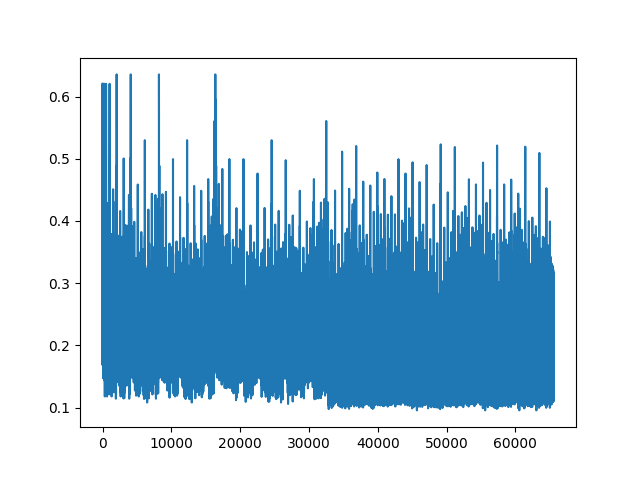

In [38]:
%matplotlib notebook

plt.plot(maxcpa_steg1)

## Steg 2

In [ ]:
keys = [0x77e] #Sorted list of keys after correlation in part 1
maxcpa = [0] * len(keys)
for i in range(len(keys)):
    maxcpa[i] = [0] * 65536
    for kguess in tnrange(0, 2**16):
        hws = np.array([[getHammingSteg2(ctPoly(d[1], 0), key[i], kguess, 0) for d in data]]).transpose()

        hws_bar = mean(hws)
        o_hws = std_dev(hws, hws_bar)
        covariance = cov(trace_array, t_bar, hws, hws_bar)
        correalation = covariance/(o_t*o_hws)
        maxcpa[i][kguess] = max(abs(correalation))

### Riktig key del 1 iterasjon 0

<IPython.core.display.Javascript object>


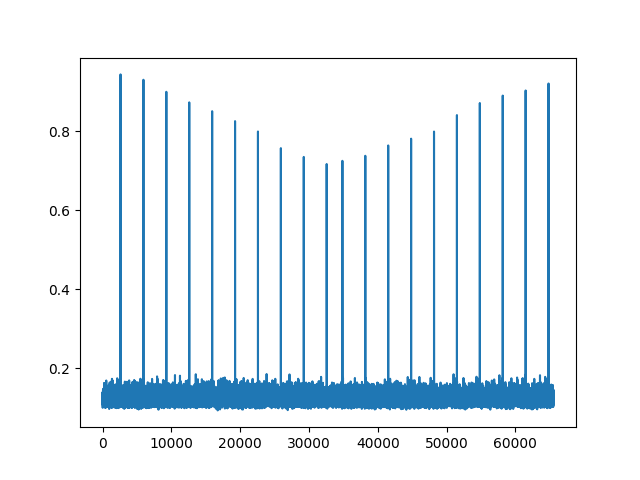

In [39]:
%matplotlib notebook

plt.plot(maxcpa_steg2)

### Riktig key del 1 iterasjon 16

In [13]:
print("del 1 key:", hex(getTrueSk(sk, 16)[1]) ,getTrueSk(sk, 16)[1])
print("del 2 key:", hex(getTrueSk(sk, 16)[0]), getTrueSk(sk, 16)[0])

del 1 key: 0x3b4 948
del 2 key: 0x175 373


<IPython.core.display.Javascript object>


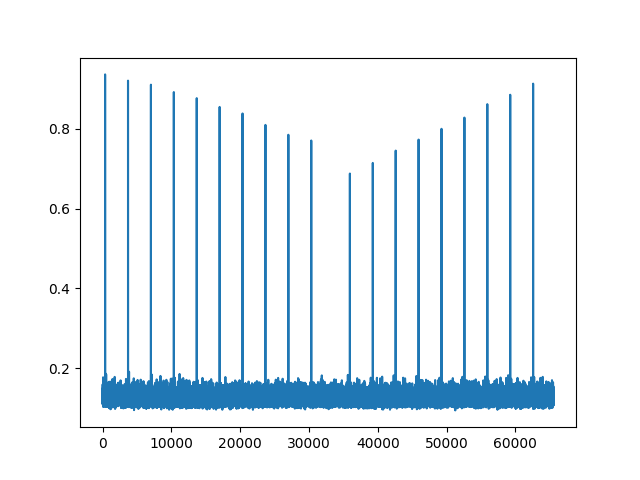

In [6]:
%matplotlib notebook

plt.plot(maxcpa_steg2_i16)

### Feil key del 1 iterasjon 0

<IPython.core.display.Javascript object>


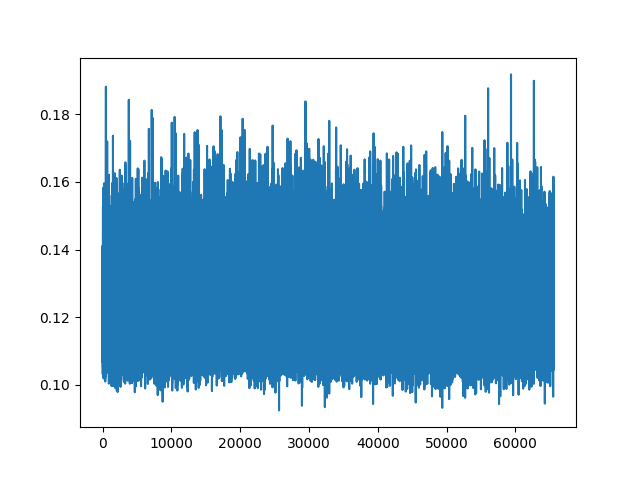

In [5]:
%matplotlib notebook

plt.plot(maxcpa_steg2_i0_feil)

### Saving data

In [32]:
0x77e

1918

In [55]:
with open("maxcpa20000", "w") as fp:
    json.dump(maxcpa, fp)

### Loading data

In [5]:
with open("maxcpa-k0-i5-1", "r") as fp:
    maxcpa = json.load(fp)

In [44]:
with open("maxcpa-k0-i2-1", "r") as fp:
    maxcpa1 = json.load(fp)

In [28]:
with open("maxcpa-steg2", "r") as fp:
    maxcpa_steg2 = json.load(fp)

In [3]:
with open("maxcpa-steg2-i16", "r") as fp:
    maxcpa_steg2_i16 = json.load(fp)

In [4]:
with open("maxcpa-steg2-i0-feil", "r") as fp:
    maxcpa_steg2_i0_feil = json.load(fp)

## Klipp og lim

In [37]:
with open("results/kyber512-50traces/maxcpa-wrong-guess50-k0-i2", "r") as fp:
    wrong1 = json.load(fp)
with open("results/kyber512-50traces/maxcpa-wrong-guess50-k02-i2", "r") as fp:
    wrong2 = json.load(fp)
print(hex(wrong1[-1][1]))
print(wrong2[1])

0x41c
[1382, 2104, 0.7310198656718254]


In [31]:
wrong1.append([0x796, 0x107, 0.8969539011586981])


In [34]:
print(hex(wrong1[-1][1]))
print(hex(wrong1[-2][1]))
print([1,2]+[3,4])

0x107
0x41c
[1, 2, 3, 4]


In [35]:
wrong = wrong1 + wrong2

In [38]:
print(len(wrong1)+len(wrong2))
print(len(wrong))

2513
2514


In [39]:
with open("results/kyber512-50traces/maxcpa-wrong-guess50-k0-i2", "w") as fp:
    json.dump(wrong, fp)

In [24]:
with open("results/kyber512-50traces/time50-k0-i2", "r") as fp:
    time1 = json.load(fp)
print(time1)

23183.507783412933


## Testing data

### Obtaining top key guesses

Selv om lavere correalation gir data med flere dekrypteringer bedre korrelasjon i forhold til andre

In [ ]:
with open("maxcpa-k0-i5-1", "r") as fp:
    maxcpa = json.load(fp)

In [6]:
sorted = np.argsort(maxcpa)[::-1]

In [7]:
i=5
k=0
print(hex(getTrueSk(sk, i//2, k)[1 + 2*(i%2)]))

0xc72


In [13]:
for i in range(400):
    print(i, hex(sorted[i]), maxcpa[sorted[i]])

0 0x0 nan
1 0x100 0.5855712195245798
2 0x1 0.5855712195245798
3 0x2 0.5855712195245798
4 0x200 0.5855712195245798
5 0x4 0.5855712195245798
6 0x400 0.5855712195245798
7 0x80 0.5855712195245798
8 0x8 0.5855712195245798
9 0x40 0.5855712195245798
10 0x800 0.5855712195245798
11 0x20 0.5855712195245798
12 0x10 0.5855712195245798
13 0x801 0.5546787347280493
14 0x802 0.5445843870427254
15 0x401 0.5445843870427254
16 0x804 0.5326593627717804
17 0x201 0.5326593627717804
18 0x402 0.5326593627717804
19 0x404 0.48845093070574114
20 0x202 0.48845093070574114
21 0x101 0.48845093070574114
22 0x808 0.48845093070574114
23 0xc01 0.463706072778292
24 0x601 0.4508246348938476
25 0xc02 0.4508246348938476
26 0x102 0.45015883568530146
27 0x204 0.45015883568530146
28 0x810 0.45015883568530146
29 0x81 0.45015883568530146
30 0x408 0.45015883568530146
31 0x301 0.4360539122563548
32 0xc04 0.4360539122563548
33 0x602 0.4360539122563548
34 0xa01 0.43573149425322916
35 0x82 0.428223942427178
36 0x104 0.42822394242717

In [36]:
guesses = []
for i in range(KYBER_Q):
    if maxcpa[i]>=.43:
        print(bin(i), maxcpa_steg1[i])
        guesses.append(i)

0b1 0.6206615292375284
0b10 0.6206615292375284
0b100 0.6206615292375284
0b1000 0.6206615292375284
0b10000 0.6206615292375284
0b100000 0.6206615292375284
0b1000000 0.6206615292375284
0b10000000 0.6206615292375284
0b10000001 0.4888006394224837
0b100000000 0.6206615292375284
0b100000001 0.502103940485052
0b100000010 0.4888006394224837
0b1000000000 0.6206615292375284
0b1000000001 0.568524265301428
0b1000000010 0.502103940485052
0b1000000100 0.4888006394224837
0b1110111111 0.43149708583420066
0b10000000000 0.6206615292375284
0b10000000001 0.5956306967549965
0b10000000010 0.568524265301428
0b10000000100 0.502103940485052
0b10000001000 0.4888006394224837
0b11000000001 0.4510857176760064
0b11101111110 0.43149708583420066
0b100000000000 0.6206615292375284
0b100000000001 0.635782399606562
0b100000000010 0.5956306967549965
0b100000000011 0.46304202364969277
0b100000000100 0.568524265301428
0b100000001000 0.502103940485052
0b100000010000 0.4888006394224837
0b110000000001 0.5005301253368079
0b11000

In [26]:
print(len(guesses))

976


In [12]:
print(hex(maxcpa_steg2_i16.index(max(maxcpa_steg2_i16))))

0x175


In [46]:
print(maxcpa_steg2_i16[0x175], maxcpa_steg2[0xfd35])

0.9437365140133332 0.920713407675079


#### Cheking correlation number for all subkeys Steg1

In [95]:
traces = 200

correalationForSubkeys_steg1 = []

maks = [-1, -1, 0]
mini = [-1, -1, 1]

average = 0

for k in tnrange(2):
    data = np.load(f'kyber512-k{k}-24400.npy', allow_pickle=True)[0:traces]
    
    trace_array = [x[2] for x in data]
    t_bar = mean(trace_array) 
    o_t = std_dev(trace_array, t_bar)
    
    ciphertexts = [x[1] for x in data]
    
    
    for i in tnrange(KYBER_N // 4):
        tmp = getTrueSk(sk, i, k)
    
        #double 1
        hws = np.array([[getHammingSteg1(ctPoly(ct, k), tmp[1], i) for ct in ciphertexts]]).transpose()
        hws_bar = mean(hws)
        o_hws = std_dev(hws, hws_bar)
        correlation = cov(trace_array, t_bar, hws, hws_bar)
        cpaoutput = abs(correlation/(o_t*o_hws))
        corr = [cpaoutput.argmax(), max(cpaoutput)]
        correalationForSubkeys_steg1.append(corr)
        print(k, 2*i, corr)
        average += corr[1]
        if (corr[1] > maks[2]):
            maks = [k, 2*i, corr[1]]
        if (corr[1] < mini[2]):
            mini = [k, 2*i, corr[1]]


        #double 2
        hws = np.array([[getHammingSteg12(ctPoly(ct, k), tmp[3], i) for ct in ciphertexts]]).transpose()
        hws_bar = mean(hws)
        o_hws = std_dev(hws, hws_bar)
        correlation = cov(trace_array, t_bar, hws, hws_bar)
        cpaoutput = abs(correlation/(o_t*o_hws))
        corr = [cpaoutput.argmax(), max(cpaoutput)]
        correalationForSubkeys_steg1.append(corr)
        print(k, 2*i+1, corr)
        average += corr[1]
        if (corr[1] > maks[2]):
            maks = [k, 2*i+1, corr[1]]
        if (corr[1] < mini[2]):
            mini = [k, 2*i+1, corr[1]]
            
average = average / len(correalationForSubkeys_steg1)
print("average =", average)
            
print(maks)
print(mini)
    

C:\Users\erlen\AppData\Local\Temp\ipykernel_8136\3163527410.py:10: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for k in tnrange(2):


  0%|          | 0/2 [00:00<?, ?it/s]

C:\Users\erlen\AppData\Local\Temp\ipykernel_8136\3163527410.py:20: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(KYBER_N // 4):


  0%|          | 0/64 [00:00<?, ?it/s]

0 0 [235, 0.4331930505603291]
0 1 [285, 0.4117060317683208]
0 2 [609, 0.37809703408165485]
0 3 [663, 0.39603914575814864]
0 4 [985, 0.5220105664872033]
0 5 [1040, 0.34638857760928965]
0 6 [1362, 0.41554301508539604]
0 7 [1416, 0.5167941774233764]
0 8 [1737, 0.3751820603824068]
0 9 [1789, 0.4001868845448842]
0 10 [2113, 0.40286620204820844]
0 11 [2168, 0.32710618305630984]
0 12 [2486, 0.3679277844567864]
0 13 [6696, 0.3073253379748012]
0 14 [2865, 0.39663880550214514]
0 15 [2917, 0.3583600514575515]
0 16 [3243, 0.569841524880934]
0 17 [3294, 0.3485209643902829]
0 18 [3618, 0.32319273337557824]
0 19 [3608, 0.3786925785840481]
0 20 [3994, 0.4634554551006536]
0 21 [4046, 0.4115406624322059]
0 22 [4370, 0.38077742363839334]
0 23 [4356, 0.29768844595444527]
0 24 [4746, 0.496774003265453]
0 25 [4798, 0.3656492261145747]
0 26 [5124, 0.4297244260139339]
0 27 [5110, 0.46231162813373283]
0 28 [5497, 0.42200767225307445]
0 29 [5551, 0.3610674719972117]
0 30 [5873, 0.33848629467341856]
0 31 [5926, 

  0%|          | 0/64 [00:00<?, ?it/s]

1 0 [297, 0.35546459209178244]
1 1 [349, 0.2894450581885833]
1 2 [670, 0.4601521630607063]
1 3 [726, 0.32730712586978616]
1 4 [1045, 0.3485049192370513]
1 5 [1102, 0.5237208871016958]
1 6 [1427, 0.24420156852379832]
1 7 [15643, 0.3381074272302415]
1 8 [1802, 0.4084980666539664]
1 9 [1859, 0.3806080112461619]
1 10 [2180, 0.3199437518133275]
1 11 [2232, 0.31494293489649006]
1 12 [2553, 0.3182489079750001]
1 13 [2608, 0.4489147775624331]
1 14 [2929, 0.4034023684513121]
1 15 [2985, 0.3018742818361325]
1 16 [3306, 0.5311090596832627]
1 17 [3357, 0.3687220087323159]
1 18 [3683, 0.3629681788364059]
1 19 [10724, 0.3021677327341729]
1 20 [4057, 0.3750334109865742]
1 21 [4109, 0.3281272627378047]
1 22 [4434, 0.443013239405455]
1 23 [4488, 0.35004384360504537]
1 24 [4809, 0.4693325217439419]
1 25 [4952, 0.29130932446174296]
1 26 [5185, 0.37210674127652793]
1 27 [5239, 0.2826673026306544]
1 28 [5562, 0.35694264126666997]
1 29 [13808, 0.30354009643949953]
1 30 [5938, 0.4773706949875726]
1 31 [5989,

#### Cheking correlation number for all subkeys Steg2

In [100]:
average = 0
maks = [-1, -1, 0]
mini = [-1, -1, 1]


correalationForSubkeys_steg2 = []

for k in range(2):
    data = np.load(f'kyber512-k{k}-24400.npy', allow_pickle=True)[0:200]
    
    trace_array = [x[2] for x in data]
    t_bar = mean(trace_array) 
    o_t = std_dev(trace_array, t_bar)
    
    ciphertexts = [x[1] for x in data]
    
    for i in tnrange(KYBER_N // 4):
        tmp = getTrueSk(sk, i, k)

        #double 1
        hws = np.array([[getHammingSteg2(ctPoly(ct, k), tmp[1], tmp[0], i) for ct in ciphertexts]]).transpose()
        hws_bar = mean(hws)
        o_hws = std_dev(hws, hws_bar)
        correlation = cov(trace_array, t_bar, hws, hws_bar)
        cpaoutput = abs(correlation/(o_t*o_hws))
        corr = [cpaoutput.argmax(), max(cpaoutput)]
        correalationForSubkeys_steg2.append(corr)
        print(k, 2*i, corr, "del1:", hex(tmp[1]), "del2:", hex(tmp[0]))
        average += corr[1]
        if (corr[1] > maks[2]):
            maks = [k, 2*i, corr[1]]
        if (corr[1] < mini[2]):
            mini = [k, 2*i, corr[1]]


        #double 2
        hws = np.array([[getHammingSteg22(ctPoly(ct, k), tmp[3], tmp[2], i) for ct in ciphertexts]]).transpose()
        hws_bar = mean(hws)
        o_hws = std_dev(hws, hws_bar)
        correlation = cov(trace_array, t_bar, hws, hws_bar)
        cpaoutput = abs(correlation/(o_t*o_hws))
        corr = [cpaoutput.argmax(), max(cpaoutput)]
        correalationForSubkeys_steg2.append(corr)
        print(k, 2*i+1, corr, "del1:", hex(tmp[3]), "del2:", hex(tmp[2]))
        average += corr[1]
        if (corr[1] > maks[2]):
            maks = [k, 2*i+1, corr[1]]
        if (corr[1] < mini[2]):
            mini = [k, 2*i+1, corr[1]]

average = average / len(correalationForSubkeys_steg2)
print(average)
print(maks)
print(mini)

C:\Users\erlen\AppData\Local\Temp\ipykernel_8136\1652201293.py:17: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(KYBER_N // 4):


  0%|          | 0/64 [00:00<?, ?it/s]

0 0 [278, 0.9482466232500402] del1: 0x77e del2: 0xa36
0 1 [326, 0.9336292505600651] del1: 0xb7 del2: 0x7b8
0 2 [654, 0.9515433597260168] del1: 0xbfa del2: 0x56b
0 3 [702, 0.9239119605991244] del1: 0x294 del2: 0xbb5
0 4 [1030, 0.9393210718595033] del1: 0xd3 del2: 0xa7
0 5 [1078, 0.9301711353956558] del1: 0xc72 del2: 0x1ad
0 6 [1406, 0.9460541474387916] del1: 0x77a del2: 0x815
0 7 [1454, 0.9384058454864173] del1: 0x7f4 del2: 0x265
0 8 [1782, 0.9424828142788007] del1: 0x1c7 del2: 0x7ed
0 9 [1834, 0.9289631245519986] del1: 0x88d del2: 0xbe0
0 10 [2158, 0.9492854317561126] del1: 0x6b2 del2: 0x4a0
0 11 [2206, 0.9156042736655394] del1: 0x96f del2: 0xe4
0 12 [2534, 0.942595572999203] del1: 0x30d del2: 0x2a3
0 13 [2582, 0.9332552495084778] del1: 0x89d del2: 0x37
0 14 [2910, 0.9457394905211781] del1: 0x913 del2: 0x8f1
0 15 [2958, 0.9496922358068317] del1: 0x7ec del2: 0xb0b
0 16 [3286, 0.9544926814140547] del1: 0x4e1 del2: 0x6a3
0 17 [3338, 0.9247817624754707] del1: 0x785 del2: 0xc73
0 18 [3662, 

  0%|          | 0/64 [00:00<?, ?it/s]

1 0 [342, 0.9402876560452937] del1: 0x23a del2: 0xa67
1 1 [390, 0.9427649126458901] del1: 0xaa0 del2: 0x3ae
1 2 [718, 0.9321197108000371] del1: 0x5c1 del2: 0xb5c
1 3 [766, 0.925631132603271] del1: 0x632 del2: 0x5bd
1 4 [1094, 0.9353601515857236] del1: 0x621 del2: 0x96e
1 5 [1142, 0.9366231744490406] del1: 0x27c del2: 0x589
1 6 [1470, 0.9275763858412802] del1: 0x2eb del2: 0x2b9
1 7 [1522, 0.9253963170602231] del1: 0x4b3 del2: 0xce1
1 8 [1842, 0.9255366453032169] del1: 0x11c del2: 0x169
1 9 [1894, 0.9431233997733109] del1: 0xb7f del2: 0x48a
1 10 [2222, 0.9205333813125248] del1: 0xa95 del2: 0x331
1 11 [2270, 0.9275195593850979] del1: 0x4e6 del2: 0x47f
1 12 [2598, 0.9454088986967097] del1: 0x9f3 del2: 0x7e9
1 13 [2646, 0.9438582803173869] del1: 0x114 del2: 0x608
1 14 [2974, 0.9265180398555152] del1: 0xc3 del2: 0x9d7
1 15 [3022, 0.931953450716682] del1: 0x82c del2: 0x4a0
1 16 [3350, 0.9309077194216211] del1: 0x31 del2: 0x1f7
1 17 [3398, 0.9333445262458182] del1: 0x84e del2: 0x4e3
1 18 [3726

In [17]:
i = 6
k = 1

with open(f"results/kyber512-200traces/maxcpa200-k{k}-i{i}-1", "r") as fp:
    maxcpa = json.load(fp)

key = getTrueSk(sk, i//2, k)[1+2*(i%2)]
maxcpasorted = np.argsort(maxcpa)[::-1]


print(np.where(maxcpasorted==key)[0][0])
print(maxcpa[key])
print(hex(getTrueSk(sk, i//2, k)[2*(i%2)]), hex(key))
for i in range(len(maxcpasorted)):
    print(i, hex(maxcpasorted[i]))

3218
0.24420156852379832
0x2b9 0x2eb
0 0x0
1 0x801
2 0x10
3 0x40
4 0x1
5 0x200
6 0x2
7 0x20
8 0x400
9 0x4
10 0x80
11 0x800
12 0x8
13 0x100
14 0x804
15 0x201
16 0x402
17 0x802
18 0x401
19 0x808
20 0x101
21 0x202
22 0x404
23 0xa01
24 0x408
25 0x102
26 0x204
27 0x81
28 0x810
29 0xc02
30 0x601
31 0xc01
32 0x701
33 0xa02
34 0x501
35 0xa81
36 0xa04
37 0x281
38 0x502
39 0x9c2
40 0x4e1
41 0x840
42 0x210
43 0x21
44 0x108
45 0x42
46 0x84
47 0x420
48 0x702
49 0x381
50 0x881
51 0xc04
52 0x301
53 0x602
54 0xb4b
55 0x803
56 0x181
57 0x604
58 0x302
59 0xc08
60 0xa61
61 0xb17
62 0x405
63 0x80a
64 0x805
65 0x1fb
66 0x3f6
67 0x7ec
68 0x208
69 0x104
70 0x41
71 0x410
72 0x82
73 0x820
74 0x9a7
75 0xad6
76 0x56b
77 0xb41
78 0x1fe
79 0xff
80 0x7f8
81 0x3fc
82 0x821
83 0x2bb
84 0xaec
85 0x576
86 0xb36
87 0x59b
88 0x2e0
89 0x5c0
90 0x2e
91 0xb80
92 0x5c
93 0x17
94 0xb8
95 0x170
96 0x9e1
97 0x5c4
98 0x171
99 0x2e2
100 0xb88
101 0xba1
102 0xaeb
103 0xafd
104 0x5d4
105 0x2ea
106 0x175
107 0xba8
108 0xb31
109 0xa2

<IPython.core.display.Javascript object>


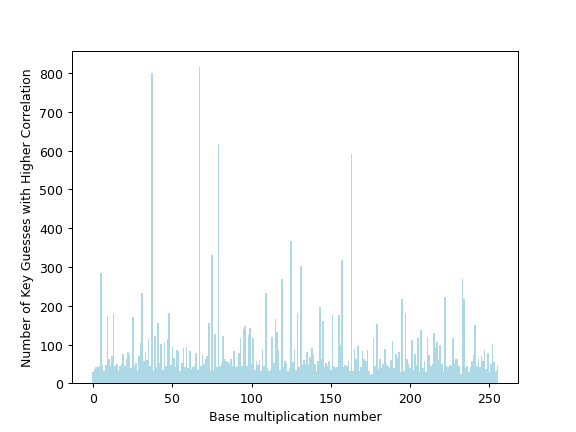

In [87]:
%matplotlib notebook

traces = 1000

#iterations = 0

plt.figure()

for k in range(2):
    for i in range(KYBER_N // 2):
        with open(f"results/kyber512-{traces}traces/maxcpa{traces}-k{k}-i{i}-1", "r") as fp:
            maxcpa = json.load(fp)

        key = getTrueSk(sk, i//2, k)[1+2*(i%2)]
        maxcpasorted = np.argsort(maxcpa)[::-1]

        #iterations += np.where(maxcpasorted==key)[0][0]

        plt.bar(KYBER_N // 2 *k +i,np.where(maxcpasorted==key)[0][0], color='lightblue', width=1)

plt.xlabel("Base multiplication number")
plt.ylabel("Number of Key Guesses with Higher Correlation")        
        
plt.show()
#print(iterations)
#print(iterations/KYBER_N)

## Calculate time

### Testing correlation equations 
by inserting known correalation

In [25]:
trace_array = [x[2] for x in data]
hws = np.array([[getHammingSteg1(ctPoly(d[1], 0), 0x77e, 0) for d in data]]).transpose()

for i in range(1000):
    trace_array[i][5000] = hws[i] #Known correlation of 1

t_bar = mean(trace_array) 
o_t = std_dev(trace_array, t_bar)
hws_bar = mean(hws)
o_hws = std_dev(hws, hws_bar)

correlation = cov(trace_array, t_bar, hws, hws_bar)
cpaoutput = correlation/(o_t*o_hws)

print(np.nanmax(cpaoutput))

0.9999999999999993


<IPython.core.display.Javascript object>


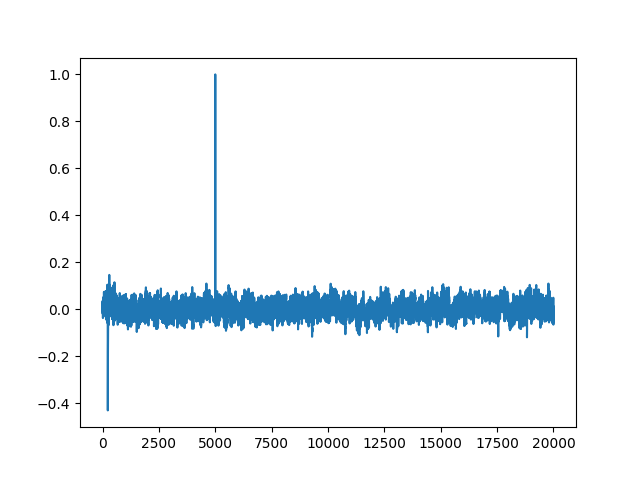

In [26]:
%matplotlib notebook

plt.plot(cpaoutput)

## Testing leakage model
Mot fasit som burde få høy correalation

In [14]:
%run "Kyber Leakage Model.ipynb"

0x1df082
0xff36a97e
0xfbb90000
0xffdacea2
0x5622da
0x5622da
0x1c4ef26
0xff7b0000
0x834ba2
0x3d6ee5e
0xff9e0000
0xff9eff7b
2226
0b00000000000000000000100010110010
0b11111111111111111111011101001110


### Del 1

In [11]:
trace_array = [x[2] for x in data]
hws = np.array([[getHammingSteg1(ctPoly(d[1], 0), 0x77e, 0) for d in data]]).transpose()

t_bar = mean(trace_array) 
o_t = std_dev(trace_array, t_bar)
hws_bar = mean(hws)
o_hws = std_dev(hws, hws_bar)

correlation = cov(trace_array, t_bar, hws, hws_bar)
cpaoutput = correlation/(o_t*o_hws)

print(np.nanmax(abs(cpaoutput)))

0.43149708583420066


<IPython.core.display.Javascript object>


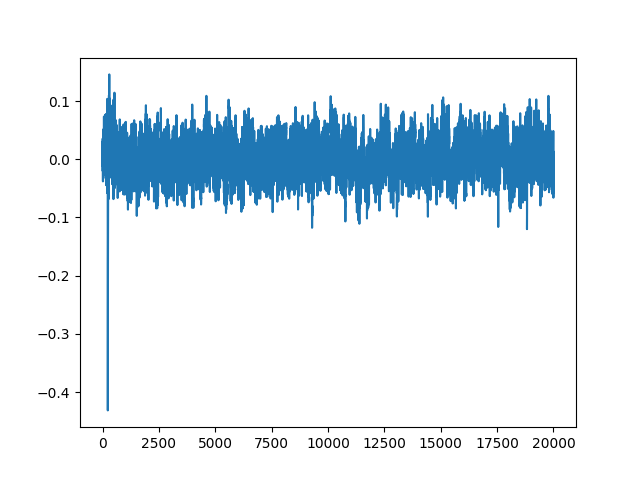

In [12]:
%matplotlib notebook

plt.plot(cpaoutput)

### Del 2

In [9]:
data_del_2 = data[200:350]

trace_array = [x[2] for x in data_del_2]
hws = np.array([[getHammingSteg2(ctPoly(d[1], 0), 0x77e, 0xa36, 0) for d in data_del_2]]).transpose()

t_bar = mean(trace_array) 
o_t = std_dev(trace_array, t_bar)
hws_bar = mean(hws)
o_hws = std_dev(hws, hws_bar)

correlation = cov(trace_array, t_bar, hws, hws_bar)
cpaoutput = correlation/(o_t*o_hws)

print(np.nanmax(abs(cpaoutput)))

0.9443253638472621


In [6]:
0x483

1155

### Cool graphs
data1 steg1: 106 [20161, 0.4710970143773517]


1387


<IPython.core.display.Javascript object>


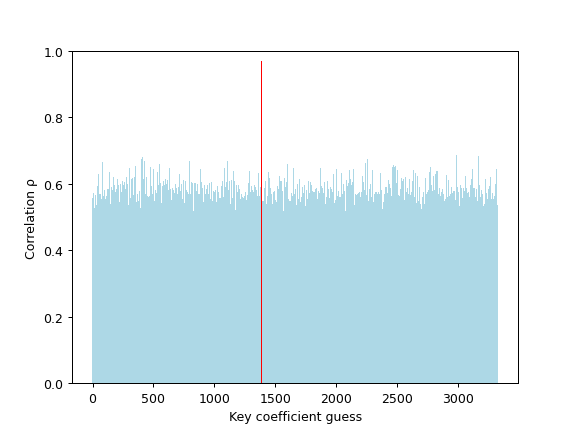

In [156]:
%matplotlib notebook

traces = 50
part = 2 
k = 0
i = 2
correct = getTrueSk(sk,i//2, k)[part%2+2*(i%2)]
print(correct)
with open(f"results/kyber512-{traces}traces/maxcpa{traces}-k{k}-i{i}-{part}", "r") as fp:
    maxcpa = json.load(fp)

plt.figure()

#width = [25 if (i == correct) else 15 for i in range(KYBER_Q)]

for i in range(KYBER_Q):
    #color = 'red' if (i == correct) else 'lightblue'
    #plt.plot([i, i+1], [maxcpa[i], maxcpa[i+1]], color)
    plt.bar(i, maxcpa[i], color='lightblue', width=5)

plt.bar(correct, maxcpa[correct], color='red', width=10, label = 'Correct key')


#plt.legend(handles=[mpatches.Patch(color='red', label='Correct key')], bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.legend()
#plt.title("Max correlation for key coefficient")
plt.xlabel("Key coefficient guess")
plt.ylabel("Correlation ρ")
plt.ylim([0, 1])

plt.show()


## Correct key correalation

<IPython.core.display.Javascript object>


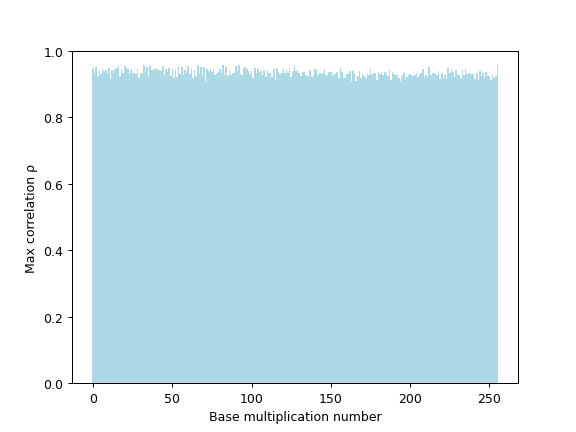

[]

In [102]:
%matplotlib notebook

plt.figure()
for i in range(len(correalationForSubkeys_steg2)):
    plt.bar(i, correalationForSubkeys_steg2[i][1], color='lightblue', width=1)

plt.xlabel("Base multiplication number")
plt.ylabel("Max correlation ρ")
plt.ylim([0, 1])

plt.plot()

## Wrong keys maxcor part 2

<IPython.core.display.Javascript object>


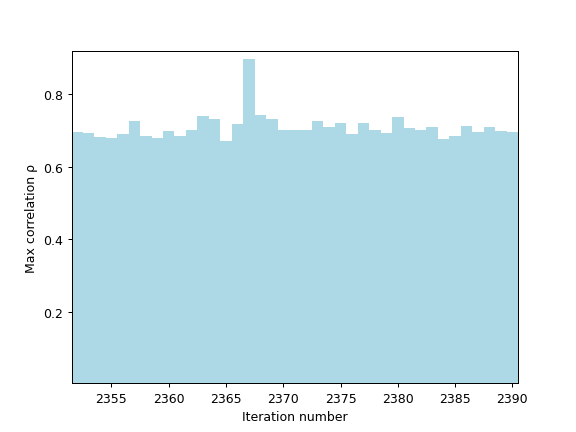

[]

In [15]:
%matplotlib notebook

traces = 50
k = 0
i =2

with open(f"results/kyber512-{traces}traces/maxcpa-wrong-guess{traces}-k{k}-i{i}", "r") as fp:
    maxcpafeil = json.load(fp)
with open(f"results/kyber512-{traces}traces/maxcpa{traces}-k{k}-i{i}-2", "r") as fp:
    maxcpariktig = json.load(fp)

plt.figure()
for i in range(len(maxcpafeil)):
    plt.bar(i, maxcpafeil[i][2], color='lightblue', width=1)

plt.bar(len(maxcpafeil), max(maxcpariktig), color='red', width=1)
#failplot = [x[2] for x in maxcpafeil]

plt.xlabel("Iteration number")
plt.ylabel("Max correlation ρ")
#plt.xlim([0, 11])

plt.plot()

In [28]:
import matplotlib.cm as cm
import matplotlib.ticker as ticker
from matplotlib.colors import Normalize

### Steg 1

<IPython.core.display.Javascript object>


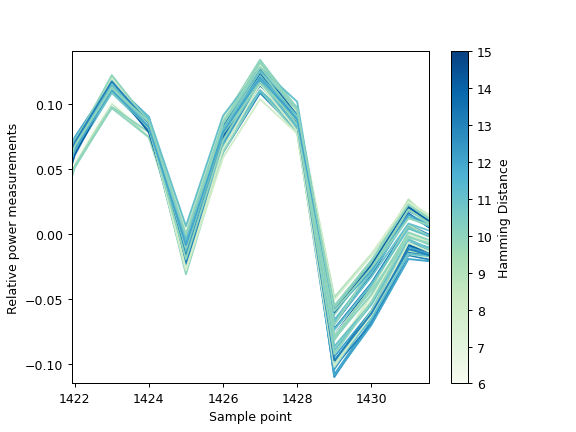

C:\Users\erlen\AppData\Local\Temp\ipykernel_8136\2670030447.py:26: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  color_bar = plt.colorbar(scalarmappaple)


In [56]:
%matplotlib notebook

k = 1
i = 6
traces = 200

data = np.load(f'kyber512-k{k}-24400.npy', allow_pickle=True)[0:traces][::-1]

cmap = cm.GnBu

hamming_values = []

for j in range(50):
    hamming_value = getHammingSteg1(ctPoly(data[j][1], k), getTrueSk(sk,i//2,k)[1+2*(i%2)], i//2)
    hamming_values.append(hamming_value)

min_hamming, max_hamming = min(hamming_values), max(hamming_values)

norm = Normalize(min_hamming, max_hamming)

for j in range(50):
    color = cmap(norm(hamming_values[j]))
    plt.plot(data[j][2], color=color)

scalarmappaple = cm.ScalarMappable(cmap=cmap, norm=norm)
color_bar = plt.colorbar(scalarmappaple)
color_bar.set_label('Hamming Distance')

plt.gca().ticklabel_format(useOffset=False)
plt.xlabel("Sample point")
plt.ylabel("Relative power measurements") 

plt.show()

## Steg 2

<IPython.core.display.Javascript object>


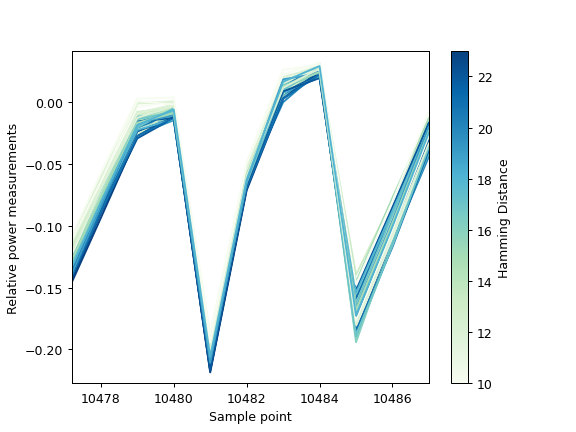

C:\Users\erlen\AppData\Local\Temp\ipykernel_8136\1966671081.py:26: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  color_bar = plt.colorbar(scalarmappaple)


In [151]:
%matplotlib notebook

k = 0
i = 55
traces = 50

data = np.load(f'kyber512-k{k}-24400.npy', allow_pickle=True)[0:traces][::-1]

cmap = cm.GnBu

hamming_values = []

for j in range(50):
    hamming_value = getHammingSteg22(ctPoly(data[j][1], k), getTrueSk(sk,i//2,k)[1+2*(i%2)], getTrueSk(sk,i//2,k)[2*(i%2)], i//2)
    hamming_values.append(hamming_value)

min_hamming, max_hamming = min(hamming_values), max(hamming_values)

norm = Normalize(min_hamming, max_hamming)

for j in range(50):
    color = cmap(norm(hamming_values[j]))
    plt.plot(data[j][2], color=color)

scalarmappaple = cm.ScalarMappable(cmap=cmap, norm=norm)
color_bar = plt.colorbar(scalarmappaple)
color_bar.set_label('Hamming Distance')

plt.gca().ticklabel_format(useOffset=False)
plt.xlabel("Sample point")
plt.ylabel("Relative power measurements") 

plt.show()

In [7]:
2*(i%2)

2